<a href="https://colab.research.google.com/github/prajaktasonawane98/My-Projects/blob/main/Task5_IPL_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Name: Prajakta Arun Sonawane**

## **Task 5 - Exploratory Data Analysis on Indian Premier League dataset**

### **Data Science and Business Analytics Intern at The Sparks Foundation**

### **Problem Statement** - Find out the most successful teams, players and factors contributing win or loss of a team.

### **Importing Libraries**

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (15, 9)
import matplotlib.pyplot as plt
%matplotlib inline

### **Loading Datasets**

In [4]:
ipl_data = pd.read_csv("/content/matches.csv")
ipl_data.tail()

# delivery_data = pd.read_csv("/content/deliveries.csv")

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


### **Data preprocessing**

In [7]:
ipl_data.shape

(756, 18)

This Dataset has 756 rows and 18 columns

In [6]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [9]:
ipl_data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


### **Exploratory Data Analysis**

In [10]:
# identifying unique values from the season column
ipl_data['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

In [12]:
# length of the season year
len(ipl_data['season'].unique())

12

### **Identifying which Team had won by maximum runs**

In [13]:
#idxmax() function - will return the id of the maximumth value which in turn is fed into.
# iloc()function- That takes an index value and returns the row.

ipl_data.iloc[ipl_data['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [14]:
# gets the unique value from overall data

ipl_data.iloc[ipl_data['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

### **Identifying which Team had won by maximum wickets**

In [16]:
ipl_data.iloc[ipl_data['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

### **Identifying which Team had won by minimum wickets?**

In [18]:
ipl_data.iloc[ipl_data[ipl_data['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

### **Identifying which Team had won by minimum runs**

In [17]:
# ge()- retrieves greater than equal to value
ipl_data.iloc[ipl_data[ipl_data['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

### **Identifying which season had most number of matches**

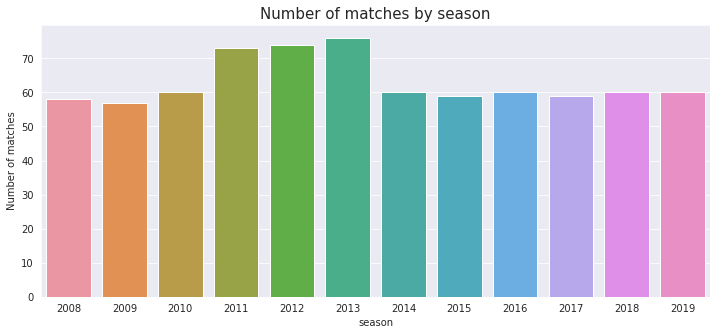

In [26]:
plt.figure(figsize=(12,5))
sns.countplot(data=ipl_data, x='season')
plt.title("Number of matches by season",fontsize=15)
plt.ylabel("Number of matches")
plt.show()

**Analysis :** the highest number of matches done in the season of IPL-2013

### **Visualization of Matches hosted in each city**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


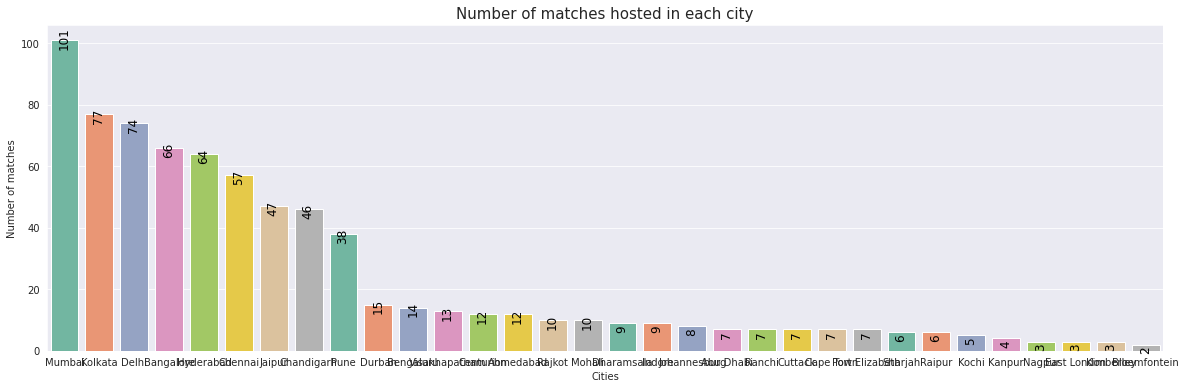

In [65]:
plt.figure(figsize=(20,6))
sns.countplot(ipl_data['city'], order=ipl_data['city'].value_counts().index, palette= 'Set2')
count = 0
cities = pd.DataFrame(ipl_data['city'].value_counts())
cities['name'] = ipl_data['city'].value_counts().index
for i in cities['city']:
  plt.text(count-0.2, i-2, str(i), rotation=90, color='black', size=12)
  count+=1

plt.xlabel('Cities')
plt.ylabel('Number of matches')
plt.title("Number of matches hosted in each city",fontsize=15)
plt.show()

**Analysis :** There was highest 101 number of matches hosted in mumbai city 

### ***NUmber of matches hosted in each stadium***

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


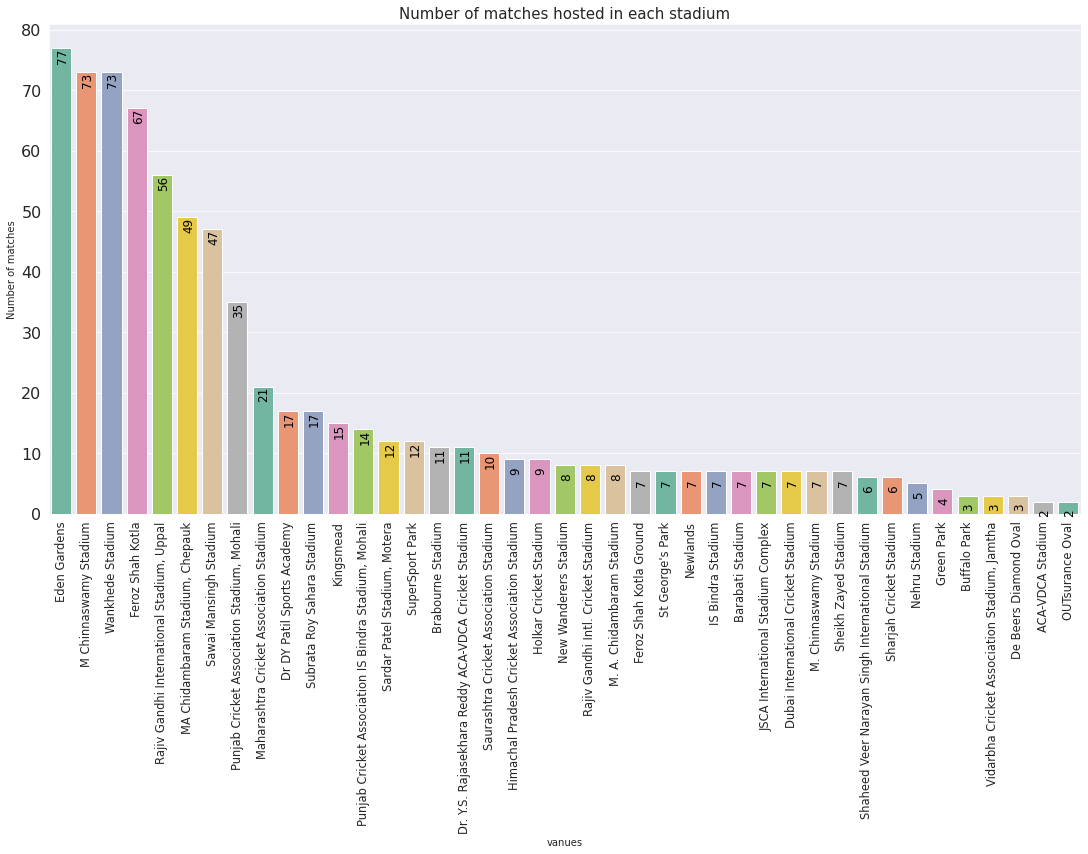

In [78]:
fig = plt.gcf()
fig.set_size_inches(18.5, 9)
plt.xticks(rotation=90, fontsize=11.5)
plt.yticks(fontsize=16)
sns.countplot(ipl_data['venue'], order=ipl_data['venue'].value_counts().index, palette= 'Set2')
count = 0
venues = pd.DataFrame(ipl_data['venue'].value_counts())
venues['name'] = ipl_data['venue'].value_counts().index
for i in venues['venue']:
  plt.text(count-0.2, i-2, str(i), rotation=90, color='black', size=12)
  count+=1

plt.xlabel('vanues')
plt.ylabel('Number of matches')
plt.title("Number of matches hosted in each stadium",fontsize=15)
plt.show()

**Analysis :** The more number of matches hosted in Eden Gardens stadium, M Chinnaswamy stadium and Wankhede stadium

### **Visualization of Top 10 Players who win the match**

In [58]:
n_top = 20
players = ipl_data.player_of_match.value_counts()
players['name'] = players.index
players = players.head(n_top)
print(players)

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
AM Rahane         12
V Kohli           12
MEK Hussey        12
DR Smith          11
AD Russell        11
V Sehwag          11
A Mishra          11
KA Pollard        10
JH Kallis         10
SE Marsh           9
SP Narine          9
Name: player_of_match, dtype: object


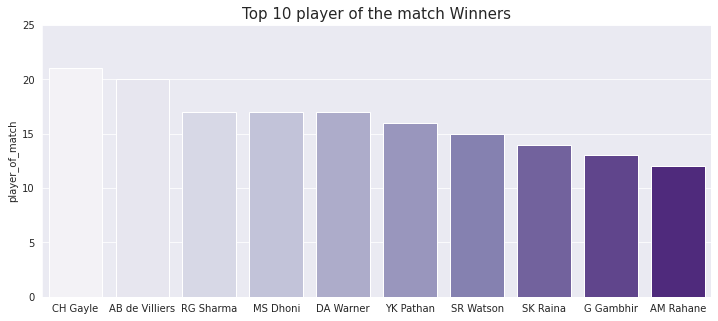

In [57]:
# Visualizing Top 10 players of match winner

players = ipl_data.player_of_match.value_counts()[:10]
fig, ax = plt.subplots(figsize=(12,5))
ax.set_ylim([0,25])
ax.set_ylabel("Counts")
ax.set_title("Top 10 player of the match Winners", fontsize=15)
sns.barplot(x = players.index, y = players, palette= "Purples")
plt.show()

**Analysis:** CH Gayle is the top player of match winner, followed by AB de villiers

### **Comparing Toss winning v/s Match winning**

In [49]:
toss_match = ipl_data['toss_winner'] == ipl_data['winner']
toss_match.groupby(toss_match).size()

False    363
True     393
dtype: int64

**Analysis**: we could say there is a correlation between Toss Winning and Match Winning.

### **Visualization of Toss winning v/s match winning**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


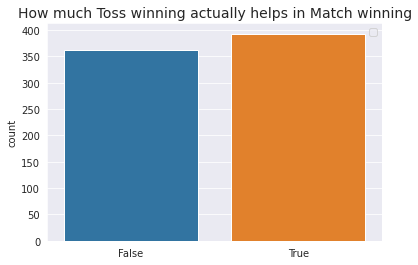

In [53]:
#sns.countplot(matches['toss_winner'] == matches['winner'])
sns.countplot(toss_match)
plt.title("How much Toss winning actually helps in Match winning", fontsize=14)
plt.legend()

**Analysis:** Toss winning and match winning is very closely related to each others. The Graph Shows more number of counts to True, means toss winning helps in match winning.

### **Visualizing the graph of most successful IPL Team**

Text(0, 0.5, 'IPL Teams')

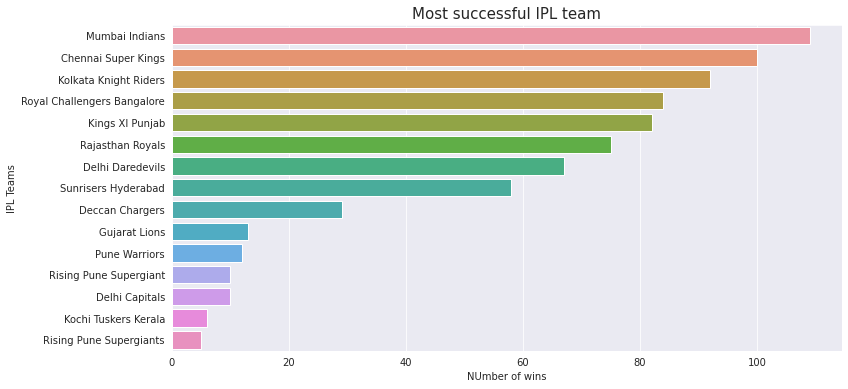

In [79]:
plt.figure(figsize=(12,6))
data = ipl_data.winner.value_counts()
sns.barplot(y = data.index, x = data)
plt.title("Most successful IPL team", fontsize=15)
plt.xlabel("NUmber of wins")
plt.ylabel("IPL Teams")

**Analysis:** Mumbai Indians is the most successful team as they have won the maximum number of IPL matches, followed by Chennai Super Kings and Kolkata Knight Riders.

### **Thank You!**